ใช้ Neural Networks ทำการ classify ภาพของตัวเลข 0-9 ที่เขียนด้วยมือ (ภาพ grayscale ขนาด 28 x 28 pixel)

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#digit = train_images[1]
#import matplotlib.pyplot as plt

#plt.imshow(digit, cmap=plt.cm.binary)
#plt.show()

In [14]:
from keras import models
from keras import layers

model = models.Sequential()

In [15]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [6]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [7]:
train_images = train_images.reshape((60000, 28,28,1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28,28,1))
test_images = test_images.astype('float32')/255


In [8]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 43s 92ms/step - loss: 0.2213 - accuracy: 0.9320
Epoch 2/5
469/469 [==============================] - 42s 90ms/step - loss: 0.0594 - accuracy: 0.9820
Epoch 3/5
469/469 [==============================] - 42s 90ms/step - loss: 0.0399 - accuracy: 0.9877
Epoch 4/5
469/469 [==============================] - 42s 90ms/step - loss: 0.0304 - accuracy: 0.9906
Epoch 5/5
469/469 [==============================] - 42s 90ms/step - loss: 0.0234 - accuracy: 0.9928


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0271 - accuracy: 0.9907
test_acc: 0.9907000064849854


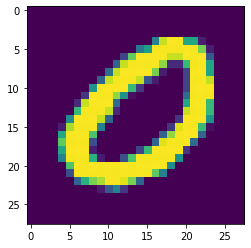

0


In [11]:
import numpy as np
import matplotlib.pyplot as plt

test_image = np.expand_dims(test_images[4320],axis=0)
plt.imshow(test_image.reshape(28,28))
plt.show()

test = model.predict(test_image)
print(test.argmax())